In [15]:
import numpy as np
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
dataset= pd.read_csv(url, names= names)

In [9]:
print(dataset.shape)

(150, 5)


In [11]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


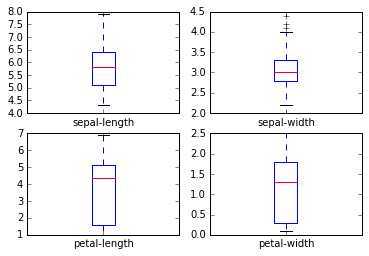

In [14]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
arr= dataset.values
X= arr[:,0:4]
Y= arr[:,4]


In [32]:
validation_size= 0.20
seed=7

In [20]:
X_train, X_validation, Y_train, Y_validation= train_test_split(X, Y, test_size= validation_size, random_state=seed)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models=[]
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
scoring= 'accuracy'
    

In [52]:
results=[]
name=[]
for name, model in models:
    kfold =KFold(n_splits=10, random_state=seed)
    cv_results =cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.941667 (0.038188)
KNN: 0.958333 (0.055902)
NB: 0.966667 (0.055277)
SVM: 0.966667 (0.055277)


In [57]:
clf= GaussianNB()
clf.fit( X_train, Y_train)

GaussianNB(priors=None)

In [63]:
predictions= clf.predict(X_validation)

In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [65]:
accuracy_score(predictions, Y_validation)

0.9333333333333333

In [66]:
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

[[ 9  0  0]
 [ 0 10  0]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.82      0.90        11

    avg / total       0.94      0.93      0.93        30

